# Movie Recommender System  using Content Based Recommendation

###  Dataset Used : TMDM

In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [2]:
df = pd.read_csv('movie_dataset.csv')
df.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [3]:
# df shape
df.shape

(4803, 24)

In [4]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [5]:
## Dropping columns that are not revelent

df = df[['title', 'id','budget', 'genres', 'keywords', 'original_language',
        'overview', 'popularity','revenue', 'runtime', 'vote_average',
       'vote_count', 'cast', 'director']]

df.head()

,title,id,budget,genres,keywords,original_language,overview,popularity,revenue,runtime,vote_average,vote_count,cast,director
0,Avatar,19995,237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Pirates of the Caribbean: At World's End,285,300000000,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Spectre,206647,245000000,Action Adventure Crime,spy based on novel secret agent sequel mi6,en,A cryptic message from Bond’s past sends him o...,107.376788,880674609,148.0,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,The Dark Knight Rises,49026,250000000,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,en,Following the death of District Attorney Harve...,112.312950,1084939099,165.0,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,John Carter,49529,260000000,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,en,"John Carter is a war-weary, former military ca...",43.926995,284139100,132.0,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [6]:
## columns remaning after dropping non relevent columns
df.columns,len(df.columns)

(Index(['title', 'id', 'budget', 'genres', 'keywords', 'original_language',
        'overview', 'popularity', 'revenue', 'runtime', 'vote_average',
        'vote_count', 'cast', 'director'],
       dtype='object'),
 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              4803 non-null   object 
 1   id                 4803 non-null   int64  
 2   budget             4803 non-null   int64  
 3   genres             4775 non-null   object 
 4   keywords           4391 non-null   object 
 5   original_language  4803 non-null   object 
 6   overview           4799 non-null   object 
 7   popularity         4803 non-null   float64
 8   revenue            4803 non-null   int64  
 9   runtime            4801 non-null   float64
 10  vote_average       4803 non-null   float64
 11  vote_count         4803 non-null   int64  
 12  cast               4760 non-null   object 
 13  director           4773 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 525.5+ KB


In [8]:
df.describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


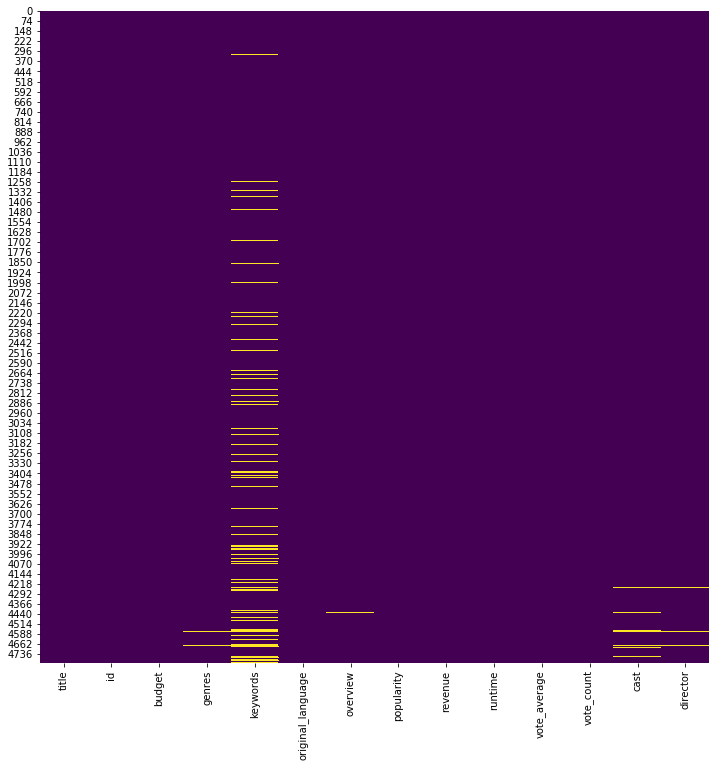

In [9]:
# plotting heatmap to see null values

plt.figure(figsize=(12,12))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [10]:
df.dropna(subset=['genres'],inplace=True)

In [11]:
df.shape

(4775, 14)

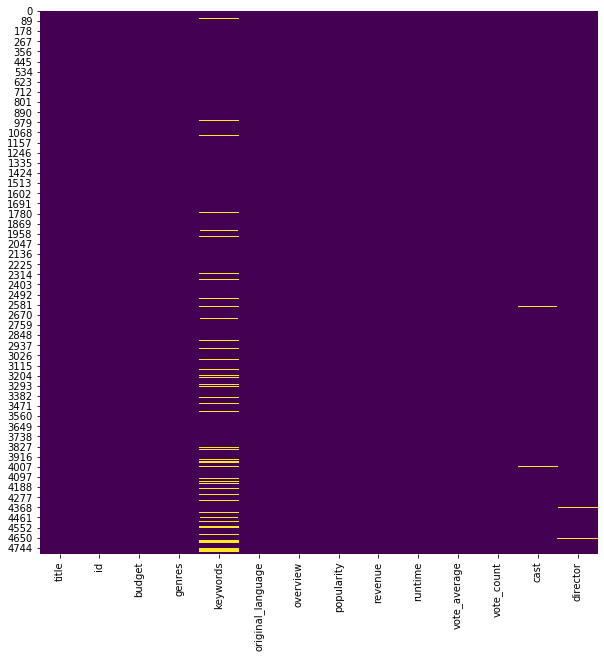

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [13]:
df.isnull().sum(axis = 0) 

title                  0
id                     0
budget                 0
genres                 0
keywords             386
original_language      0
overview               4
popularity             0
revenue                0
runtime                2
vote_average           0
vote_count             0
cast                  27
director              16
dtype: int64

In [14]:
df[df['overview'].isnull()] 

,title,id,budget,genres,keywords,original_language,overview,popularity,revenue,runtime,vote_average,vote_count,cast,director
2656,Chiamatemi Francesco - Il Papa della gente,370980,15000000,Drama,pope biography,it,NaN,0.738646,0,NaN,7.3,12,Rodrigo de la Serna Sergio Hern\u00e1ndez \u00...,Daniele Luchetti
4140,"To Be Frank, Sinatra at 100",459488,2,Documentary,music actors legendary perfomer classic hollyw...,en,NaN,0.050625,0,NaN,0.0,0,Tony Oppedisano,Simon Napier-Bell
4401,The Helix... Loaded,43630,0,Action Comedy Science Fiction,NaN,en,NaN,0.020600,0,97.0,4.8,2,NaN,NaN
4431,Food Chains,292539,913000,Documentary,NaN,de,NaN,0.795698,0,83.0,7.4,8,NaN,Sanjay Rawal


In [15]:
df.dropna(subset=['overview','keywords'],how='all',inplace=True)

In [16]:
df.shape

(4773, 14)

In [17]:
df.isnull().sum(axis=0)

title                  0
id                     0
budget                 0
genres                 0
keywords             384
original_language      0
overview               2
popularity             0
revenue                0
runtime                2
vote_average           0
vote_count             0
cast                  25
director              15
dtype: int64

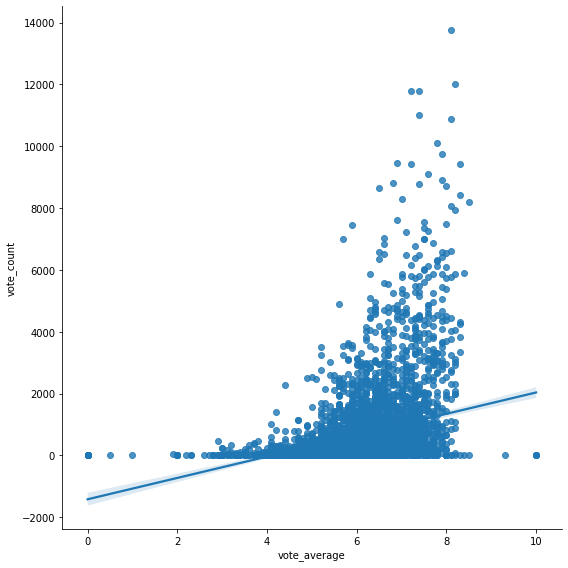

In [18]:
sns.lmplot(data=df,x='vote_average',y='vote_count',height=8)

In [19]:
df=df[df['vote_count']>=5]
df.shape

(4555, 14)

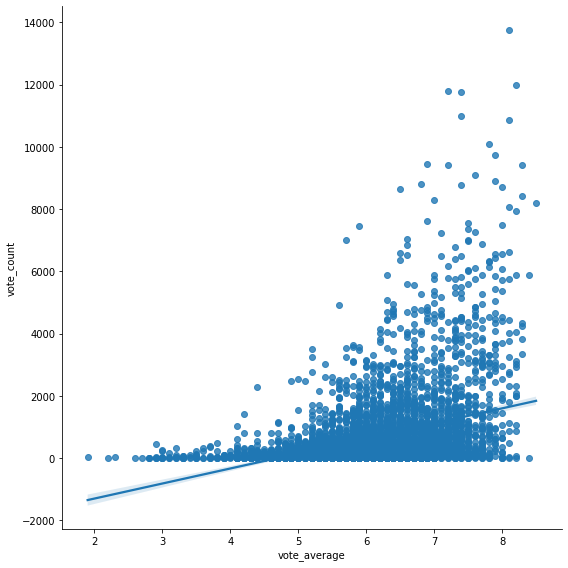

In [20]:
sns.lmplot(data=df,x='vote_average',y='vote_count',height=8)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4555 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              4555 non-null   object 
 1   id                 4555 non-null   int64  
 2   budget             4555 non-null   int64  
 3   genres             4555 non-null   object 
 4   keywords           4267 non-null   object 
 5   original_language  4555 non-null   object 
 6   overview           4554 non-null   object 
 7   popularity         4555 non-null   float64
 8   revenue            4555 non-null   int64  
 9   runtime            4554 non-null   float64
 10  vote_average       4555 non-null   float64
 11  vote_count         4555 non-null   int64  
 12  cast               4550 non-null   object 
 13  director           4552 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 533.8+ KB


In [22]:
## replacing the nan with not avaliable for keywords columns 
df[['overview','keywords','director','cast']] = df[['overview','keywords','director','cast']].replace(np.NAN,'not_avaliable')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4555 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              4555 non-null   object 
 1   id                 4555 non-null   int64  
 2   budget             4555 non-null   int64  
 3   genres             4555 non-null   object 
 4   keywords           4555 non-null   object 
 5   original_language  4555 non-null   object 
 6   overview           4555 non-null   object 
 7   popularity         4555 non-null   float64
 8   revenue            4555 non-null   int64  
 9   runtime            4554 non-null   float64
 10  vote_average       4555 non-null   float64
 11  vote_count         4555 non-null   int64  
 12  cast               4555 non-null   object 
 13  director           4555 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 533.8+ KB


In [24]:
df.shape

(4555, 14)

In [25]:
df.reset_index(inplace=True)

In [26]:
## converting Genres which is a a categorical column into vector using Count Vectorizer
vectorizer = CountVectorizer()
x_genres = vectorizer.fit_transform(df['genres'])

genres_categories = vectorizer.get_feature_names()
print(genres_categories)
print('Total Categories:',len(genres_categories))

['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'fiction', 'foreign', 'history', 'horror', 'movie', 'music', 'mystery', 'romance', 'science', 'thriller', 'tv', 'war', 'western']
Total Categories: 22


In [28]:
# converting keywords column into vector using Count Vectorizer
vectorizer = CountVectorizer()
x_keywords = vectorizer.fit_transform(df['keywords'])
keywords_categories = vectorizer.get_feature_names()

print(keywords_categories[:20])
print('Total Categories:',len(keywords_categories))

['11', '15th', '17th', '18th', '1910s', '1917', '1920s', '1930s', '1950s', '1960s', '1970s', '1980s', '1990s', '1992', '1995', '19th', '2001', '2002', '3d', '51']
Total Categories: 4297


In [27]:
# keywords has a lot of categories  # count vectorizer will given n*4338 dimm vector


In [29]:
# adding genre categories to dataframe
x_genres.toarray().shape 
df_2 = pd.DataFrame(x_genres.toarray(),columns=genres_categories)
df_2

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4551,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4552,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4553,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [30]:
df=pd.concat([df,df_2],axis=1)

In [31]:
df.columns,len(df.columns)

(Index(['index', 'title', 'id', 'budget', 'genres', 'keywords',
        'original_language', 'overview', 'popularity', 'revenue', 'runtime',
        'vote_average', 'vote_count', 'cast', 'director', 'action', 'adventure',
        'animation', 'comedy', 'crime', 'documentary', 'drama', 'family',
        'fantasy', 'fiction', 'foreign', 'history', 'horror', 'movie', 'music',
        'mystery', 'romance', 'science', 'thriller', 'tv', 'war', 'western'],
       dtype='object'),
 37)

In [32]:
df=df.drop(['index','genres'],axis=1)

In [33]:
df.head()

,title,id,budget,keywords,original_language,overview,popularity,revenue,runtime,vote_average,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,Avatar,19995,237000000,culture clash future space war space colony so...,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,7.2,...,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,285,300000000,ocean drug abuse exotic island east india trad...,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,6.9,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,206647,245000000,spy based on novel secret agent sequel mi6,en,A cryptic message from Bond’s past sends him o...,107.376788,880674609,148.0,6.3,...,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,49026,250000000,dc comics crime fighter terrorist secret ident...,en,Following the death of District Attorney Harve...,112.312950,1084939099,165.0,7.6,...,0,0,0,0,0,0,1,0,0,0
4,John Carter,49529,260000000,based on novel mars medallion space travel pri...,en,"John Carter is a war-weary, former military ca...",43.926995,284139100,132.0,6.1,...,0,0,0,0,0,1,0,0,0,0


In [34]:
pd.set_option('display.max_columns',50) ## increasing no of columns to display

In [35]:
## checking the null columns 
df.isna().sum()

title                0
id                   0
budget               0
keywords             0
original_language    0
overview             0
popularity           0
revenue              0
runtime              1
vote_average         0
vote_count           0
cast                 0
director             0
action               0
adventure            0
animation            0
comedy               0
crime                0
documentary          0
drama                0
family               0
fantasy              0
fiction              0
foreign              0
history              0
horror               0
movie                0
music                0
mystery              0
romance              0
science              0
thriller             0
tv                   0
war                  0
western              0
dtype: int64

### Analysing Features

1) Original langugae

In [36]:
original_lang=df['original_language']
original_lang.value_counts()

en    4279
fr      65
es      31
zh      26
de      24
ja      16
hi      16
it      14
cn      12
ru      11
ko      11
pt       7
da       7
sv       5
fa       4
th       3
he       3
nl       3
ar       2
id       2
af       1
te       1
nb       1
no       1
tr       1
ps       1
ta       1
is       1
el       1
hu       1
cs       1
ro       1
xx       1
pl       1
Name: original_language, dtype: int64

Text(0.5, 1.0, 'Movie Languages')

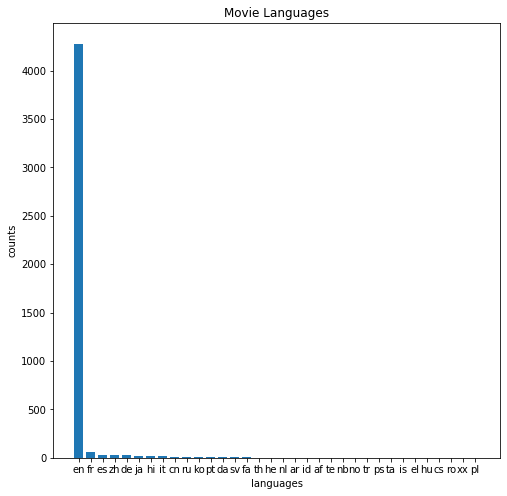

In [37]:
plt.figure(figsize=(8,8))
plt.bar(original_lang.value_counts().index,original_lang.value_counts())
plt.xlabel('languages')
plt.ylabel('counts')
plt.title("Movie Languages")

In [38]:
# Since most movies are english we convert the originl language to a binar variable 0:English ,1: Other
df['original_language']= df['original_language'].apply(lambda x:0 if x=='en' else 1)


In [39]:
df.head()

,title,id,budget,keywords,original_language,overview,popularity,revenue,runtime,vote_average,vote_count,cast,director,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,Avatar,19995,237000000,culture clash future space war space colony so...,0,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,285,300000000,ocean drug abuse exotic island east india trad...,0,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Spectre,206647,245000000,spy based on novel secret agent sequel mi6,0,A cryptic message from Bond’s past sends him o...,107.376788,880674609,148.0,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,49026,250000000,dc comics crime fighter terrorist secret ident...,0,Following the death of District Attorney Harve...,112.312950,1084939099,165.0,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,John Carter,49529,260000000,based on novel mars medallion space travel pri...,0,"John Carter is a war-weary, former military ca...",43.926995,284139100,132.0,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


**2) Transforming Numerical Features**

In [40]:
df.describe()

,id,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
count,4555.000000,4.555000e+03,4555.000000,4555.000000,4.555000e+03,4554.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000
mean,50911.618441,3.058084e+07,0.060593,22.645178,8.671883e+07,108.080369,6.201010,727.694841,0.248079,0.170801,0.049616,0.363557,0.148628,0.018002,0.478814,0.107574,0.091548,0.114160,0.005928,0.041932,0.110209,0.001537,0.037761,0.073765,0.187925,0.114160,0.267838,0.001537,0.030296,0.016246
std,81593.697790,4.125726e+07,0.238608,32.274901,1.660771e+08,21.115512,0.918436,1256.980307,0.431945,0.376377,0.217174,0.481076,0.355760,0.132974,0.499606,0.309876,0.288418,0.318041,0.076771,0.200456,0.313184,0.039176,0.190638,0.261417,0.390695,0.318041,0.442881,0.039176,0.171420,0.126434
min,5.000000,0.000000e+00,0.000000,0.001117,0.000000e+00,0.000000,1.900000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8795.000000,2.000000e+06,0.000000,5.759519,0.000000e+00,94.000000,5.700000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13778.000000,1.550000e+07,0.000000,14.188982,2.336759e+07,104.000000,6.300000,269.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49474.500000,4.000000e+07,0.000000,29.413745,9.844601e+07,118.000000,6.800000,797.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,426469.000000,3.800000e+08,1.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
#scaling budget and revenue as the values are very large
df['budget']/=10**6
df['revenue']/=10**6

In [44]:
#renaming columns
df.rename(columns={'budget':"budget(millions usd)",'revenue':'revenue(millions usd)'},inplace=True)

### Distribution for Numerical Columns

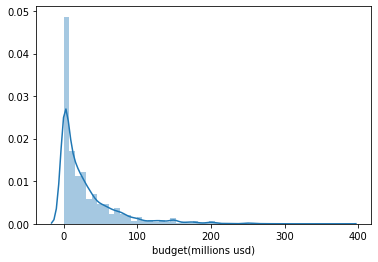

In [45]:
sns.distplot(df['budget(millions usd)'])

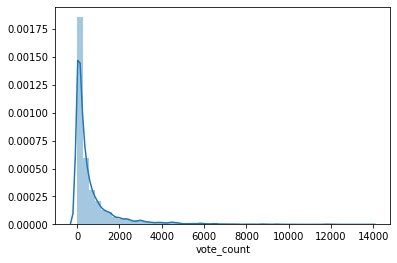

In [46]:
sns.distplot(df['vote_count'])

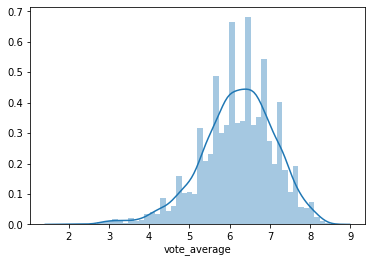

In [47]:
sns.distplot(df['vote_average'])

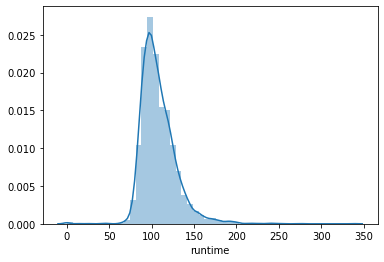

In [48]:
sns.distplot(df['runtime'])

In [49]:
# Since run time is normally distributed but with long tails we replace the nan with median

df['runtime'] = df['runtime'].replace(np.NAN,df['runtime'].median())

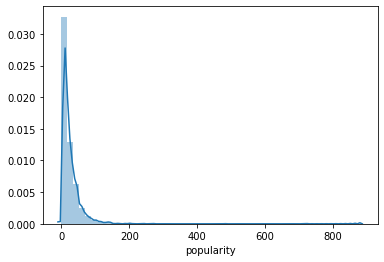

In [50]:
sns.distplot(df['popularity'])

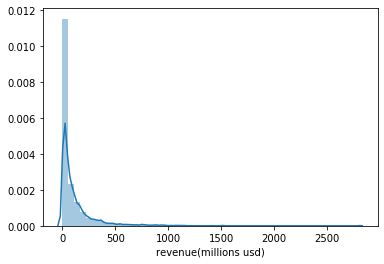

In [51]:
sns.distplot(df['revenue(millions usd)'])

### Feature Scaling

##### Since all the numerical features have heavy tails  minmax scaling won't be ideal thus we use StandardScaler for scaling our numerical data

In [52]:
#using standard scalar
scaler = StandardScaler()
numerical_columns=['popularity','runtime','vote_average','vote_count','budget(millions usd)','revenue(millions usd)']
df_numerical=df[numerical_columns]
df_numerical.head()

,popularity,runtime,vote_average,vote_count,budget(millions usd),revenue(millions usd)
0,150.437577,162.0,7.2,11800,237.0,2787.965087
1,139.082615,169.0,6.9,4500,300.0,961.000000
2,107.376788,148.0,6.3,4466,245.0,880.674609
3,112.312950,165.0,7.6,9106,250.0,1084.939099
4,43.926995,132.0,6.1,2124,260.0,284.139100


In [53]:
df_numerical.describe()

,popularity,runtime,vote_average,vote_count,budget(millions usd),revenue(millions usd)
count,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000
mean,22.645178,108.079473,6.201010,727.694841,30.580838,86.718831
std,32.274901,21.113280,0.918436,1256.980307,41.257263,166.077060
min,0.001117,0.000000,1.900000,5.000000,0.000000,0.000000
25%,5.759519,94.000000,5.700000,71.000000,2.000000,0.000000
50%,14.188982,104.000000,6.300000,269.000000,15.500000,23.367586
75%,29.413745,118.000000,6.800000,797.000000,40.000000,98.446008
max,875.581305,338.000000,8.500000,13752.000000,380.000000,2787.965087


In [54]:
scaler.fit(df_numerical)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
data_transformed=scaler.transform(df_numerical)

In [56]:
df[numerical_columns]=data_transformed

In [57]:
df.head()

,title,id,budget(millions usd),keywords,original_language,overview,popularity,revenue(millions usd),runtime,vote_average,vote_count,cast,director,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,Avatar,19995,5.003769,culture clash future space war space colony so...,0,"In the 22nd century, a paraplegic Marine is di...",3.959932,16.266803,2.554148,1.087827,8.809622,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,285,6.530941,ocean drug abuse exotic island east india trad...,0,"Captain Barbossa, long believed to be dead, ha...",3.608074,5.264888,2.885730,0.761149,3.001415,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Spectre,206647,5.197696,spy based on novel secret agent sequel mi6,0,A cryptic message from Bond’s past sends him o...,2.625598,4.781172,1.890986,0.107793,2.974363,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight Rises,49026,5.318900,dc comics crime fighter terrorist secret ident...,0,Following the death of District Attorney Harve...,2.778556,6.011245,2.696255,1.523397,6.666155,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,John Carter,49529,5.561308,based on novel mars medallion space travel pri...,0,"John Carter is a war-weary, former military ca...",0.659465,1.188857,1.133086,-0.109992,1.110963,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [58]:
df.shape

(4555, 35)

In [59]:
df.describe()

,id,budget(millions usd),original_language,popularity,revenue(millions usd),runtime,vote_average,vote_count,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
count,4555.000000,4.555000e+03,4555.000000,4.555000e+03,4.555000e+03,4.555000e+03,4.555000e+03,4.555000e+03,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000
mean,50911.618441,2.626366e-15,0.060593,-5.927689e-17,-5.679711e-15,-1.571374e-16,7.430085e-16,3.955368e-16,0.248079,0.170801,0.049616,0.363557,0.148628,0.018002,0.478814,0.107574,0.091548,0.114160,0.005928,0.041932,0.110209,0.001537,0.037761,0.073765,0.187925,0.114160,0.267838,0.001537,0.030296,0.016246
std,81593.697790,1.000110e+00,0.238608,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,1.000110e+00,0.431945,0.376377,0.217174,0.481076,0.355760,0.132974,0.499606,0.309876,0.288418,0.318041,0.076771,0.200456,0.313184,0.039176,0.190638,0.261417,0.390695,0.318041,0.442881,0.039176,0.171420,0.126434
min,5.000000,-7.413045e-01,0.000000,-7.016767e-01,-5.222175e-01,-5.119590e+00,-4.683484e+00,-5.750084e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8795.000000,-6.928229e-01,0.000000,-5.232398e-01,-5.222175e-01,-6.669271e-01,-5.455629e-01,-5.224958e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13778.000000,-3.655718e-01,0.000000,-2.620341e-01,-3.814988e-01,-1.932396e-01,1.077930e-01,-3.649581e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49474.500000,2.283282e-01,0.000000,2.097391e-01,7.062062e-02,4.699230e-01,6.522562e-01,5.514229e-02,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,426469.000000,8.470206e+00,1.000000,2.643013e+01,1.626680e+01,1.089105e+01,2.503431e+00,1.036272e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Processing Directors column

In [63]:
# converting all strings to lowercase for simplicity
df=df.applymap(lambda s:s.lower() if type(s) == str else s)

In [64]:
director = df['director'].value_counts()

In [65]:
director.index

Index(['steven spielberg', 'woody allen', 'clint eastwood', 'martin scorsese',
       'robert rodriguez', 'spike lee', 'ridley scott', 'steven soderbergh',
       'renny harlin', 'tim burton',
       ...
       'rick bieber', 'daniel barber', 'deb hagan', 'chris morris',
       'dennis iliadis', 'chatrichalerm yukol', 'ted kotcheff', 'tim miller',
       'william eubank', 'katt shea'],
      dtype='object', length=2166)

In [66]:
director[:50]

steven spielberg        27
woody allen             21
clint eastwood          20
martin scorsese         20
robert rodriguez        16
spike lee               16
ridley scott            16
steven soderbergh       15
renny harlin            15
tim burton              14
oliver stone            14
ron howard              13
robert zemeckis         13
joel schumacher         13
michael bay             12
brian de palma          12
francis ford coppola    12
tony scott              12
barry levinson          12
kevin smith             12
chris columbus          11
bobby farrelly          11
richard donner          11
sam raimi               11
joel coen               11
shawn levy              11
richard linklater       11
rob reiner              11
david fincher           10
wes craven              10
john carpenter          10
paul w.s. anderson      10
stephen frears          10
john mctiernan          10
tyler perry              9
lasse hallstr\u00f6m     9
m. night shyamalan       9
r

In [67]:
dir_coded=[dir for dir in director.index if '\\u' in dir]
dir_coded[:10]

['lasse hallstr\\u00f6m',
 'alejandro gonz\\u00e1lez i\\u00f1\\u00e1rritu',
 'alejandro amen\\u00e1bar',
 'jaume balaguer\\u00f3',
 'mikael h\\u00e5fstr\\u00f6m',
 'alfonso cuar\\u00f3n',
 'jean-marc vall\\u00e9e',
 'baltasar korm\\u00e1kur',
 'nimr\\u00f3d antal',
 'jean-marie poir\\u00e9']

In [68]:
coded=dir_coded[0].encode()
coded

b'lasse hallstr\\u00f6m'

In [69]:
dir_coded[0]=coded.decode('unicode_escape')
dir_coded[0]

'lasse hallström'

In [70]:
def unicode_decoder(string):
    string=string.encode()
    
    return string.decode('unicode_escape')

In [71]:
df['director'] = df['director'].apply(unicode_decoder)

In [72]:
## doing the same with cast
df['cast'] = df['cast'].apply(unicode_decoder)

In [99]:
#dir_coded=[dir for dir in df['director'] if '\\u' in dir]
#dir_coded[:10]

[]

In [75]:
# encoding directors from string of names to integer categories
#label_encoder=LabelEncoder()
#label_encoder.fit(df['director'])
#directors_encoded=label_encoder.transform(df['director'])
#df['director_encoded']=directors_encoded

In [76]:
#len(label_encoder.classes_),label_encoder.classes_

(2144,
 array(['aaron hann', 'aaron schneider', 'abel ferrara', ...,
        'Émile gaudreault', 'Éric tessier', 'Étienne faure'], dtype=object))

In [79]:
# changing column order 
#col=df.columns.tolist()
#l[13])
#col_updated=col[:13]+col[-1:]+col[13:]
#df=df[col_updated[:-1]]

action


In [73]:
df.head()

,title,id,budget(millions usd),keywords,original_language,overview,popularity,revenue(millions usd),runtime,vote_average,vote_count,cast,director,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,avatar,19995,5.003769,culture clash future space war space colony so...,0,"in the 22nd century, a paraplegic marine is di...",3.959932,16.266803,2.554148,1.087827,8.809622,sam worthington zoe saldana sigourney weaver s...,james cameron,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1,pirates of the caribbean: at world's end,285,6.530941,ocean drug abuse exotic island east india trad...,0,"captain barbossa, long believed to be dead, ha...",3.608074,5.264888,2.885730,0.761149,3.001415,johnny depp orlando bloom keira knightley stel...,gore verbinski,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,spectre,206647,5.197696,spy based on novel secret agent sequel mi6,0,a cryptic message from bond’s past sends him o...,2.625598,4.781172,1.890986,0.107793,2.974363,daniel craig christoph waltz léa seydoux ralph...,sam mendes,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,the dark knight rises,49026,5.318900,dc comics crime fighter terrorist secret ident...,0,following the death of district attorney harve...,2.778556,6.011245,2.696255,1.523397,6.666155,christian bale michael caine gary oldman anne ...,christopher nolan,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,john carter,49529,5.561308,based on novel mars medallion space travel pri...,0,"john carter is a war-weary, former military ca...",0.659465,1.188857,1.133086,-0.109992,1.110963,taylor kitsch lynn collins samantha morton wil...,andrew stanton,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [74]:
df.shape

(4555, 35)

## Vectorizing  keywords and overview

In [75]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download('wordnet')
from nltk.stem import SnowballStemmer
import re

In [77]:
# cleaning the text columns
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
         'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [78]:
### processing the keywords
# converting the string to 
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [84]:
decontracted("python she'll won")

'python she will won'

In [119]:
stemmer = SnowballStemmer('english')
stemmer.stem('texts')

'text'

In [147]:
# Processing keywordsing
keywords = df['keywords']
keywords

0       culture clash future space war space colony so...
1       ocean drug abuse exotic island east india trad...
2              spy based on novel secret agent sequel mi6
3       dc comics crime fighter terrorist secret ident...
4       based on novel mars medallion space travel pri...
                              ...                        
4550    distrust garage identity crisis time travel ti...
4551    united states\u2013mexico barrier legs arms pa...
4552                                        not_avaliable
4553    date love at first sight narration investigati...
4554                 obsession camcorder crush dream girl
Name: keywords, Length: 4555, dtype: object

In [154]:
tokenizer = RegexpTokenizer(r'\w+')
stemmer = SnowballStemmer('english')
def text_processor(data):
    processed_data =[]
    for line in data:
        line = decontracted(line)
        words = tokenizer.tokenize(line)
        processed_line = [stemmer.stem(word) for word in words if word not in stopwords]
 
        processed_data.append(processed_line)
        
    return processed_data

In [155]:
i=353
print(keywords[i])
text_processor([keywords[i]])

film making satire jungle movie star southeast asia


[['film', 'make', 'satir', 'jungl', 'movi', 'star', 'southeast', 'asia']]

In [156]:
keywords_bag = text_processor(keywords)

In [159]:
keywords_bag[:2]

[['cultur', 'clash', 'futur', 'space', 'war', 'space', 'coloni', 'societi'],
 ['ocean',
  'drug',
  'abus',
  'exot',
  'island',
  'east',
  'india',
  'trade',
  'compani',
  'love',
  'one',
  'life']]

In [160]:
## processing overview
overview = df['overview']

overview_bag = text_processor(overview)

In [162]:
for overview in overview_bag[:1]:
    print(overview,'\n')

['22nd', 'centuri', 'parapleg', 'marin', 'dispatch', 'moon', 'pandora', 'uniqu', 'mission', 'becom', 'torn', 'follow', 'order', 'protect', 'alien', 'civil'] 



In [ ]:
## Processing cast

In [165]:
cast = df['cast']
cast[:5]

0    sam worthington zoe saldana sigourney weaver s...
1    johnny depp orlando bloom keira knightley stel...
2    daniel craig christoph waltz léa seydoux ralph...
3    christian bale michael caine gary oldman anne ...
4    taylor kitsch lynn collins samantha morton wil...
Name: cast, dtype: object

In [177]:
for actors in cast[:]:
    actor = actors.split(' ')
    if len(actor)<=4:
        print(actor)

['philippe', 'labro', 'jacques', 'perrin']
['not_avaliable']
['robert', 'redford']
['casey', 'affleck', 'matt', 'damon']
['laura', 'ramsey']
['not_avaliable']
['joe', 'marino']
['jason', 'bateman', 'matthias', 'klie']
['shereef', 'akeel']
['kevin', 'hart', "na'im", 'lynn']
['not_avaliable']
['tori', 'spelling', 'les', 'williams']
['ace', 'marrero', 'katie', 'stegeman']
['not_avaliable']
['amos', 'oz']
['tupac', 'amaru', 'shakur']
['brit', 'morgan', 'noah', 'segan']
['not_avaliable']
['richard', 'linklater', 'mark', 'james']
['alex', 'kendrick']


In [169]:
## processing cast
cast_top2=[]
for actors in cast[:]:
    actor = actors.split(' ')
    if len(actor)<=4:
        if len(actor) ==1:
            cast_top2.append(actor)
            continue
        if len(actor)==2:
            first_actor = ' '.join(actor)
            cast_top2.append([first_actor])
            continue
        else:
            first_actor = ' '.join(actor[:2])
            second_actor= ' '.join(actor[2:]) 
            cast_top2.append([first_actor,second_actor])
            continue
    # if more than 4 words in cast 
    f1,f2,s1,s2=0,1,2,3   
    first_actor =' '.join([actor[f1],actor[f2]])
    if (len(actor[f2])<=2 and '.' in actor[f2]) or actor[f2] in ['de','la','le'] or 'jr.' in actor[s1]  :
        f2+=1
        s1+=1
        s2+=1
        first_actor = ' '.join([first_actor,actor[f2]])
    
    second_actor = actor[s1]+' '+actor[s2]
    if(( len(actor[s2])<=2  and '.' in actor[s2]) or actor[s2] in ['de','la','le']   or 'jr.' in actor[s2+1]):
        second_actor =' '.join([second_actor,actor[s2+1]])
    
    
    #if len(actor[1])<=2 or len(actor[3])<=2:
     #   print(first_actor,"   ",second_actor)
    cast_top2.append([first_actor,second_actor])    

In [170]:
len(cast_top2)

4555

In [171]:
names ={}
for actors in cast:
    actor = actors.split(' ')
    if len(actor)<=4:
        continue
    for act in actor[:4]:
        if len(act)<=2 and '.' not in act :
            if act not in names.keys() :
                names[act]=1
            else:
                names[act]+=1
            

In [172]:
names

{'ed': 21,
 'li': 16,
 'ty': 2,
 'de': 50,
 'ni': 2,
 'le': 3,
 'll': 5,
 'al': 21,
 'hu': 2,
 '50': 1,
 'ki': 1,
 'ye': 2,
 'j': 1,
 'sô': 1,
 'qi': 2,
 'xu': 1,
 'wu': 1,
 'oh': 1,
 'ja': 1,
 'la': 3,
 'dj': 1,
 'jr': 1,
 'lo': 1,
 'ng': 2,
 'oz': 1,
 'da': 1,
 'p': 1,
 'om': 1,
 'bo': 1,
 'cj': 1,
 'aj': 1,
 'te': 1,
 '': 1,
 'jo': 1}

In [174]:
# for finding 2 char names
for actors in cast:
    if 'la' in actors.split( )[1:5]:
        print(actors)

jack black ana de la reguera héctor jiménez darius rose moisés arias
nathaniel brown paz de la huerta cyril roy masato tanno jesse kuhn
rodrigo de la serna sergio hernández Àlex brendemühl maximilian dirr mercedes morán
paz de la huerta katrina bowden kathleen turner judd nelson boris kodjoe
adriana caselotti lucille la verne harry stockwell roy atwell pinto colvig


In [180]:
for cast1 in cast_top2[:100]:
    act1=cast1[0].split(' ')
    act2=''
    if len(cast1)>1:
        act2 = cast1[1].split(' ')
    act1+=act2
    for char in act1:
        if len(char)<=2 or '.' in char:
            print(cast1)

['robert downey jr.', 'chris hemsworth']
['robert downey jr.', 'chris evans']
['chris evans', 'robert downey jr.']
['robert downey jr.', 'gwyneth paltrow']
['ed asner', 'christopher plummer']
['robert downey jr.', 'terrence howard']
['brendan fraser', 'jet li']
['robert downey jr.', 'gwyneth paltrow']
['chris evans', 'samuel l. jackson']
['john c. reilly', 'sarah silverman']


In [186]:
directors = df['director']
len(directors),len(overview_bag),len(cast_top2),len(keywords)

(4555, 4555, 4555, 4555)

In [187]:
# putting all the bag of words in df
df['overview_bag'] = overview_bag
df['keywords_bag'] = keywords_bag
df['cast_top2'] = cast_top2


In [189]:
df.columns

Index(['title', 'id', 'budget(millions usd)', 'keywords', 'original_language',
       'overview', 'popularity', 'revenue(millions usd)', 'runtime',
       'vote_average', 'vote_count', 'cast', 'director', 'action', 'adventure',
       'animation', 'comedy', 'crime', 'documentary', 'drama', 'family',
       'fantasy', 'fiction', 'foreign', 'history', 'horror', 'movie', 'music',
       'mystery', 'romance', 'science', 'thriller', 'tv', 'war', 'western',
       'overview_bag', 'keywords_bag', 'cast_top2'],
      dtype='object')

In [191]:
df[['title', 'id', 'budget(millions usd)',  'original_language',
       'popularity', 'revenue(millions usd)', 'runtime',
       'vote_average', 'vote_count','keywords','overview',  'cast', 'director',
       'overview_bag', 'keywords_bag', 'cast_top2' ,'action', 'adventure',
       'animation', 'comedy', 'crime', 'documentary', 'drama', 'family',
       'fantasy', 'fiction', 'foreign', 'history', 'horror', 'movie', 'music',
       'mystery', 'romance', 'science', 'thriller', 'tv', 'war', 'western']]

,title,id,budget(millions usd),original_language,popularity,revenue(millions usd),runtime,vote_average,vote_count,keywords,overview,cast,director,overview_bag,keywords_bag,cast_top2,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western
0,avatar,19995,5.003769,0,3.959932,16.266803,2.554148,1.087827,8.809622,culture clash future space war space colony so...,"in the 22nd century, a paraplegic marine is di...",sam worthington zoe saldana sigourney weaver s...,james cameron,"[22nd, centuri, parapleg, marin, dispatch, moo...","[cultur, clash, futur, space, war, space, colo...","[sam worthington, zoe saldana]",1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1,pirates of the caribbean: at world's end,285,6.530941,0,3.608074,5.264888,2.885730,0.761149,3.001415,ocean drug abuse exotic island east india trad...,"captain barbossa, long believed to be dead, ha...",johnny depp orlando bloom keira knightley stel...,gore verbinski,"[captain, barbossa, long, believ, dead, come, ...","[ocean, drug, abus, exot, island, east, india,...","[johnny depp, orlando bloom]",1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,spectre,206647,5.197696,0,2.625598,4.781172,1.890986,0.107793,2.974363,spy based on novel secret agent sequel mi6,a cryptic message from bond’s past sends him o...,daniel craig christoph waltz léa seydoux ralph...,sam mendes,"[cryptic, messag, bond, past, send, trail, unc...","[spi, base, novel, secret, agent, sequel, mi6]","[daniel craig, christoph waltz]",1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,the dark knight rises,49026,5.318900,0,2.778556,6.011245,2.696255,1.523397,6.666155,dc comics crime fighter terrorist secret ident...,following the death of district attorney harve...,christian bale michael caine gary oldman anne ...,christopher nolan,"[follow, death, district, attorney, harvey, de...","[dc, comic, crime, fighter, terrorist, secret,...","[christian bale, michael caine]",1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,john carter,49529,5.561308,0,0.659465,1.188857,1.133086,-0.109992,1.110963,based on novel mars medallion space travel pri...,"john carter is a war-weary, former military ca...",taylor kitsch lynn collins samantha morton wil...,andrew stanton,"[john, carter, war, weari, former, militari, c...","[base, novel, mar, medallion, space, travel, p...","[taylor kitsch, lynn collins]",1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,primer,14337,-0.741135,0,0.020537,-0.519660,-1.472196,0.761149,-0.055452,distrust garage identity crisis time travel ti...,friends/fledgling entrepreneurs invent a devic...,shane carruth david sullivan casey gooden anan...,shane carruth,"[friend, fledgl, entrepreneur, invent, devic, ...","[distrust, garag, ident, crisi, time, travel, ...","[shane carruth, david sullivan]",0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
4551,el mariachi,9367,-0.735972,1,-0.259530,-0.509927,-1.282721,0.434471,-0.389623,united states\u2013mexico barrier legs arms pa...,el mariachi just wants to play his guitar and ...,carlos gallardo jaime de hoyos peter marquardt...,robert rodriguez,"[el, mariachi, want, play, guitar, carri, fami...","[unit, state, u2013mexico, barrier, leg, arm, ...","[carlos gallardo, jaime de hoyos]",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4552,newlyweds,72766,-0.741086,0,-0.681800,-0.522218,-1.093246,-0.327778,-0.575008,not_avaliable,a newlywed couple's honeymoon is upended by th...,edward burns kerry bishé marsha dietlein caitl...,edward burns,"[newlyw, coupl, honeymoon, upend, arriv, respe...",[not_avali],"[edward burns, kerry bishé]",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4553,"signed, sealed, delivered",231617,-0.741305,0,-0.656951,-0.522218,0.564661,0.870041,-0.574213,date love at first sight narration investigati...,"""signe

In [192]:
numerical_columns

['popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'budget(millions usd)',
 'revenue(millions usd)']

In [193]:
text_columns =['keywords_bag','overview_bag','cast_top2','director']

In [194]:
df[text_columns]

,keywords_bag,overview_bag,cast_top2,director
0,"[cultur, clash, futur, space, war, space, colo...","[22nd, centuri, parapleg, marin, dispatch, moo...","[sam worthington, zoe saldana]",james cameron
1,"[ocean, drug, abus, exot, island, east, india,...","[captain, barbossa, long, believ, dead, come, ...","[johnny depp, orlando bloom]",gore verbinski
2,"[spi, base, novel, secret, agent, sequel, mi6]","[cryptic, messag, bond, past, send, trail, unc...","[daniel craig, christoph waltz]",sam mendes
3,"[dc, comic, crime, fighter, terrorist, secret,...","[follow, death, district, attorney, harvey, de...","[christian bale, michael caine]",christopher nolan
4,"[base, novel, mar, medallion, space, travel, p...","[john, carter, war, weari, former, militari, c...","[taylor kitsch, lynn collins]",andrew stanton
...,...,...,...,...
4550,"[distrust, garag, ident, crisi, time, travel, ...","[friend, fledgl, entrepreneur, invent, devic, ...","[shane carruth, david sullivan]",shane carruth
4551,"[unit, state, u2013mexico, barrier, leg, arm, ...","[el, mariachi, want, play, guitar, carri, fami...","[carlos gallardo, jaime de hoyos]",robert rodriguez
4552,[not_avali],"[newlyw, coupl, honeymoon, upend, arriv, respe...","[edward burns, kerry bishé]",edward burns
4553,"[date, love, first, sight, narrat, investig, t...","[sign, seal, deliv, introduc, dedic, quartet, ...","[eric mabius, kristin booth]",scott smith


In [217]:
# combing all the text columns data to create a create a vector

text_data=[]
for overview,keyword,cast,director in zip(df['overview_bag'],df['keywords_bag'],df['cast_top2'],df['director']):
    #print(type(overview+keyword+cast+[director]))
    vec=overview+keyword+cast+[director]
    text_data.append(vec)

In [219]:
text_data[:5]

[['22nd',
  'centuri',
  'parapleg',
  'marin',
  'dispatch',
  'moon',
  'pandora',
  'uniqu',
  'mission',
  'becom',
  'torn',
  'follow',
  'order',
  'protect',
  'alien',
  'civil',
  'cultur',
  'clash',
  'futur',
  'space',
  'war',
  'space',
  'coloni',
  'societi',
  'sam worthington',
  'zoe saldana',
  'james cameron'],
 ['captain',
  'barbossa',
  'long',
  'believ',
  'dead',
  'come',
  'back',
  'life',
  'head',
  'edg',
  'earth',
  'turner',
  'elizabeth',
  'swann',
  'noth',
  'quit',
  'seem',
  'ocean',
  'drug',
  'abus',
  'exot',
  'island',
  'east',
  'india',
  'trade',
  'compani',
  'love',
  'one',
  'life',
  'johnny depp',
  'orlando bloom',
  'gore verbinski'],
 ['cryptic',
  'messag',
  'bond',
  'past',
  'send',
  'trail',
  'uncov',
  'sinist',
  'organ',
  'battl',
  'polit',
  'forc',
  'keep',
  'secret',
  'servic',
  'aliv',
  'bond',
  'peel',
  'back',
  'layer',
  'deceit',
  'reveal',
  'terribl',
  'truth',
  'behind',
  'spectr',
  's

In [226]:
def do_nothing(data):
    return data
text_vectorizer = CountVectorizer(tokenizer=do_nothing,
                             preprocessor=None,
                             lowercase=False)
text_vector = text_vectorizer.fit_transform(text_data)

In [230]:
text_vector=text_vector.toarray()

In [232]:
text_vectorizer.get_feature_names()[:20]

[' jason',
 '"weird al"',
 '0',
 '00',
 '000',
 '007',
 '07am',
 '1',
 '10',
 '100',
 '1000',
 '101',
 '108',
 '10th',
 '11',
 '114',
 '117',
 '118',
 '119',
 '11th']

In [236]:
numerical_data = df[numerical_columns+['original_language']]

In [237]:
numerical_data.shape,text_vector.shape

((4555, 7), (4555, 21075))

In [242]:
#stacking data horizontally 
data_vector=np.hstack((numerical_data,text_vector))

In [245]:
data_vector.shape

(4555, 21082)

In [248]:
%%timeit
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(data_vector,data_vector)

3.53 s ± 502 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [289]:
titles = pd.Series(df.title)
# recommends top 10 movies based on cosine similarity
def recommendations(title, cosine_sim = similarity_matrix):
    
    # initializing the empty list of recommended movies
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = titles[titles == title].index[0]
    #print(idx)
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(df.title)[i])
        
    return recommended_movies

In [308]:
recommendations('2 fast 2 furious')

['the fast and the furious: tokyo drift',
 'the final destination',
 'the fast and the furious',
 'gone in sixty seconds',
 'cars 2',
 'fast five',
 'furious 7',
 'days of thunder',
 'cars',
 'bad boys ii']